In [1]:
#!pip install plotly

In [2]:
import numpy as np
import pandas as pd
import sys
import torch
import torchsummary as summary
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_blobs, make_circles, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
X, y = make_regression(n_samples=500, n_features=1, random_state=0, noise=10.0)

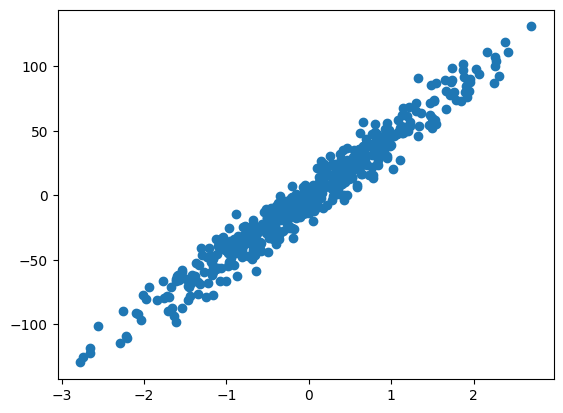

In [4]:
plt.scatter(X, y)
plt.show()

In [5]:
sk_model = LinearRegression().fit(X, y)
preds = sk_model.predict(X)

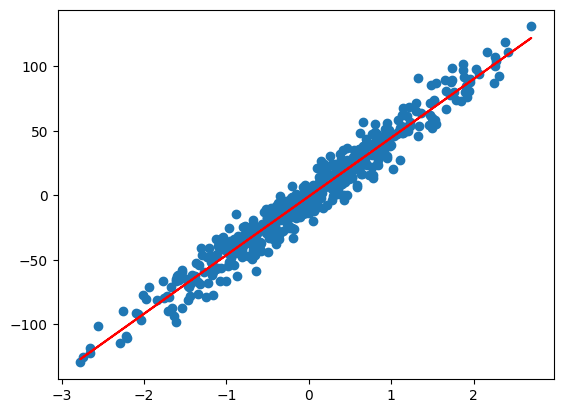

In [6]:
plt.scatter(X, y)
plt.plot(X, preds, c= 'r')
plt.show()

In [7]:
sk_model.intercept_ , sk_model.coef_[0]

(-0.7691089617235793, 45.4968982165931)

In [8]:
class NNLinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(in_features = input_size, out_features = output_size) #wz + b

    def forward(self, x):
        out  = self.linear(x)
        return out 

In [9]:
#help(NNLinearRegression)

In [10]:
model = NNLinearRegression(input_size = 1 , output_size = 1)
model

NNLinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [11]:
summary.summary(model, (1,));

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               2
Total params: 2
Trainable params: 2
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [12]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.3695]])),
             ('linear.bias', tensor([0.1331]))])

In [13]:
X_t = torch.tensor(X, dtype = torch.float32)

In [14]:
X_t[0]

tensor([0.6204])

In [15]:
y_t = torch.tensor(X, dtype = torch.float32)
y_t[:5]

tensor([[ 0.6204],
        [ 0.0105],
        [ 0.0940],
        [-1.6760],
        [ 1.4805]])

In [16]:
y_p = model(X_t[0]).item()
print(f"Predicted: {y_p:.2f}")
print(f"   Actual: {y[0]:.2f}")

Predicted: 0.36
   Actual: 31.08


In [17]:
LEARNING_RATE  = 0.1
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = LEARNING_RATE)

In [18]:
BATCH_SIZE  = 50
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size = BATCH_SIZE, shuffle = True)

In [19]:
print(f"Total number of batches: {len(dataloader)}")

Total number of batches: 10


In [20]:
XX, yy = next(iter(dataloader))

In [21]:
XX.shape , yy.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [22]:
def trainer(model, loss_fun, optimizer, dataloader, epochs=5, verbose=True):
    for epoch in range(epochs):
        losses = 0
        for X, y in dataloader:
            optimizer.zero_grad()
            y_pred = model(X).flatten()
            loss = loss_fun(y_pred, y)
            loss.backward()
            optimizer.step()
            losses += loss
        if verbose: print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

In [23]:
trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True)

epoch: 1, loss: 1.0398
epoch: 2, loss: 1.0002
epoch: 3, loss: 1.0003
epoch: 4, loss: 0.9980
epoch: 5, loss: 0.9972


In [24]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.0059]])),
             ('linear.bias', tensor([-0.0282]))])

In [25]:
pd.DataFrame({"w0": [sk_model.intercept_, model.state_dict()['linear.bias'].item()],
              "w1": [sk_model.coef_[0], model.state_dict()['linear.weight'].item()]},
             index=['sklearn', 'pytorch']).round(2)

,w0,w1
sklearn,-0.77,45.50
pytorch,-0.03,0.01


#### Multiple Linear Regression with a Neural Network

In [26]:
X, y = make_regression(n_samples = 500, n_features = 3 , random_state=0, noise=10.0)

In [27]:
X.shape , y.shape

((500, 3), (500,))

#### Format Data

In [28]:
X_t = torch.tensor(X, dtype = torch.float32)
y_t = torch.tensor(y, dtype = torch.float32)

In [29]:
X_t[:5] , y_t[:5]

(tensor([[ 0.0230, -0.0111,  0.0115],
         [-0.0170,  0.3792,  2.2593],
         [ 0.2381, -1.4060, -0.5901],
         [-1.4617, -0.6834,  0.3675],
         [-0.3068, -0.4063, -0.8640]]),
 tensor([  0.2201,  39.8261, -84.7518, -39.1479, -34.0324]))

#### Create Data Loader

In [30]:
BATCH_SIZE = 50
LEARNING_RATE = 0.1
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size = BATCH_SIZE, shuffle = True)

In [31]:
len(dataloader)

10

#### Create Model

In [32]:
model = NNLinearRegression(input_size = 3, output_size = 1)

In [33]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.4190, -0.5521,  0.0934]])),
             ('linear.bias', tensor([-0.1031]))])

In [34]:
summary.summary(model, (3,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               4
Total params: 4
Trainable params: 4
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


#### ( Objective - function - Loss Function - Cost Function)

In [35]:
loss_fn = nn.MSELoss()
criterion = optim.SGD(model.parameters(), lr = 0.1)

In [36]:
trainer(model, loss_fn, criterion, dataloader, epochs = 5, verbose = True)

epoch: 1, loss: 1015.1971
epoch: 2, loss: 110.8189
epoch: 3, loss: 102.8583
epoch: 4, loss: 102.2837
epoch: 5, loss: 102.2571


In [37]:
sk_model = LinearRegression().fit(X, y)
pd.DataFrame({"w0": [sk_model.intercept_, model.state_dict()['linear.bias'].item()],
              "w1": [sk_model.coef_[0], model.state_dict()['linear.weight'][0, 0].item()],
              "w2": [sk_model.coef_[1], model.state_dict()['linear.weight'][0, 1].item()],
              "w3": [sk_model.coef_[2], model.state_dict()['linear.weight'][0, 2].item()]},
             index=['sklearn', 'pytorch']).round(2)

,w0,w1,w2,w3
sklearn,0.43,0.62,55.99,11.14
pytorch,0.49,0.05,55.97,11.30


In [38]:
summary.summary(model, (3,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               4
Total params: 4
Trainable params: 4
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


#### Non-linear Regression with a Neural Network

In [39]:
np.random.seed(2020)
X = np.sort(np.random.randn(500))
y = X ** 2 + 15 * np.sin(X) **3
X_t = torch.tensor(X[:, None], dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)

# Create dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

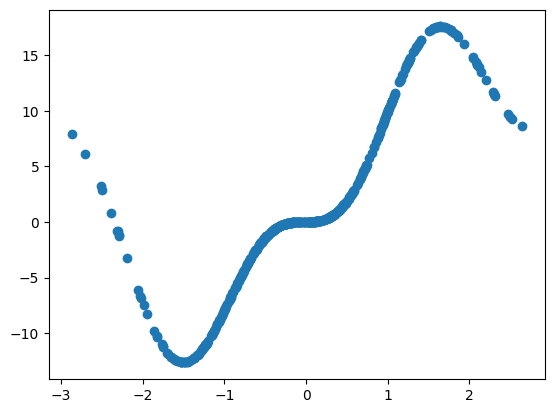

In [40]:
plt.scatter(X, y)
plt.show()

In [41]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

<img src = 'https://www.tomasbeuzen.com/deep-learning-with-pytorch/_images/nn-5.png' width='400px' height = '250px'/>

In [42]:
class NonLinearRegressionV01(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        return x

In [43]:
modelV01 = NonLinearRegressionV01(input_size = 1, hidden_size = 3, output_size = 1)
modelV01 

NonLinearRegressionV01(
  (hidden): Linear(in_features=1, out_features=3, bias=True)
  (sigmoid): Sigmoid()
  (output): Linear(in_features=3, out_features=1, bias=True)
)

In [44]:
modelV01.state_dict()

OrderedDict([('hidden.weight',
              tensor([[ 0.3085],
                      [-0.2480],
                      [ 0.1438]])),
             ('hidden.bias', tensor([ 0.7424, -0.1285,  0.7801])),
             ('output.weight', tensor([[ 0.1240, -0.3098,  0.5698]])),
             ('output.bias', tensor([-0.5381]))])

In [45]:
class NonLinearRegressionV02(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main  = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Sigmoid(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        x = self.main(x)
        return x

In [46]:
modelV02 = NonLinearRegressionV02(input_size = 1, hidden_size = 3, output_size = 1)
modelV02

NonLinearRegressionV02(
  (main): Sequential(
    (0): Linear(in_features=1, out_features=3, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=3, out_features=1, bias=True)
  )
)

In [47]:
modelV02.state_dict()

OrderedDict([('main.0.weight',
              tensor([[ 0.5953],
                      [-0.5511],
                      [-0.1105]])),
             ('main.0.bias', tensor([-0.4313, -0.9627,  0.8331])),
             ('main.2.weight', tensor([[0.2486, 0.0766, 0.3404]])),
             ('main.2.bias', tensor([0.3419]))])

In [48]:
summary.summary(modelV02, (1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 3]               6
           Sigmoid-2                    [-1, 3]               0
            Linear-3                    [-1, 1]               4
Total params: 10
Trainable params: 10
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [49]:
criterion = nn.MSELoss()
optimizer  = optim.SGD(modelV02.parameters(), lr = 0.3)

In [50]:
trainer(modelV02, criterion, optimizer, dataloader, epochs=5, verbose=True)

epoch: 1, loss: 34.2759
epoch: 2, loss: 14.6351
epoch: 3, loss: 7.5837
epoch: 4, loss: 6.8933
epoch: 5, loss: 4.9859


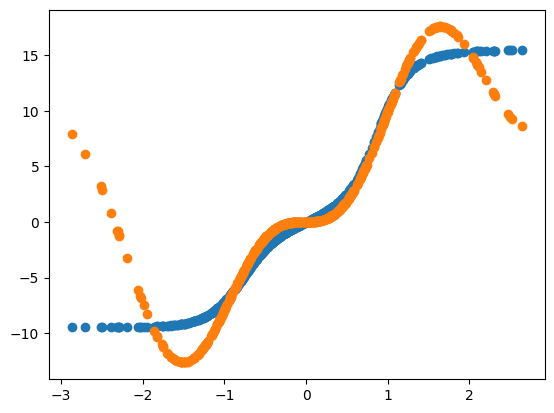

In [51]:
y_p = modelV02(X_t).detach().numpy().squeeze()
plt.scatter(x = X, y = y_p)
plt.scatter(X, y)
plt.show()

### Deep Learning

<img src = 'https://www.tomasbeuzen.com/deep-learning-with-pytorch/_images/nn-6.png' style='width:800px;height:400px'/>

In [52]:
class DeepRegression(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super().__init__()
        self.main  = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.Sigmoid(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.Sigmoid(),
            nn.Linear(hidden_size2, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

In [53]:
modelDR = DeepRegression(input_size = 1, hidden_size1 = 5, hidden_size2 = 3, output_size = 1)
modelDR

DeepRegression(
  (main): Sequential(
    (0): Linear(in_features=1, out_features=5, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=5, out_features=3, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=3, out_features=1, bias=True)
  )
)

In [54]:
modelDR.state_dict()

OrderedDict([('main.0.weight',
              tensor([[-0.9271],
                      [-0.8522],
                      [-0.6883],
                      [ 0.3093],
                      [-0.5751]])),
             ('main.0.bias',
              tensor([ 0.6570,  0.5414,  0.8537,  0.5713, -0.6460])),
             ('main.2.weight',
              tensor([[-0.1589,  0.2593,  0.3433, -0.0463,  0.3697],
                      [-0.4428, -0.3668, -0.4405,  0.2290, -0.2920],
                      [ 0.3235, -0.2037,  0.1755, -0.0983,  0.1635]])),
             ('main.2.bias', tensor([-0.0896, -0.2805, -0.0466])),
             ('main.4.weight', tensor([[ 0.3711, -0.2756,  0.0769]])),
             ('main.4.bias', tensor([0.3802]))])

In [55]:
summary.summary(modelDR, (1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 5]              10
           Sigmoid-2                    [-1, 5]               0
            Linear-3                    [-1, 3]              18
           Sigmoid-4                    [-1, 3]               0
            Linear-5                    [-1, 1]               4
Total params: 32
Trainable params: 32
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [56]:
dataset_dr = TensorDataset(X_t, y_t)
dataloader_dr = DataLoader(dataset = dataset_dr, batch_size = BATCH_SIZE, shuffle = True)

In [57]:
loss_dr_fn = nn.MSELoss()
optimizer_dr = optim.SGD(modelDR.parameters(), lr = 0.3)

In [58]:
#trainer(model = modelDR, loss_fun = loss_dr_fn, optimizer = optimizer_dr, dataloader = dataset_dr, epochs=50, verbose=False)

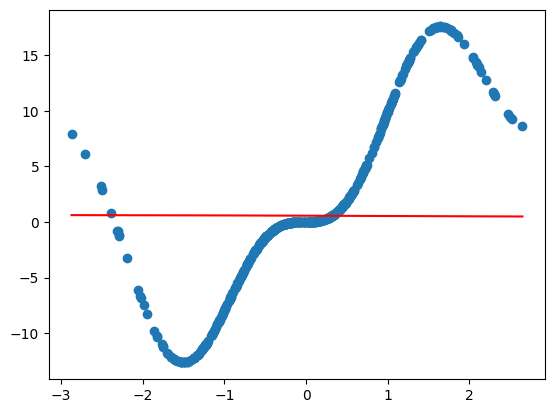

In [59]:
#plot_regression(X, y, model(X_t).detach(), y_range=[-25, 25], dy=5)

y_p = modelDR(X_t).detach()
plt.scatter(X, y)
plt.plot(X,  y_p, c = 'r')
plt.show()


#### Neural Network Classification

##### Binary Classification

In [65]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=2020)
X_t = torch.tensor(X, dtype = torch.float32)
y_t = torch.tensor(y, dtype = torch.float32)

bc_dataset = TensorDataset(X_t, y_t)
bc_dataloader = DataLoader(dataset = bc_dataset, batch_size = BATCH_SIZE, shuffle = True)

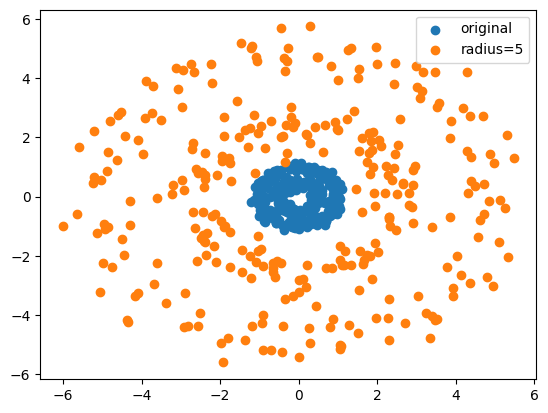

In [81]:
# plt.scatter(X[:,0], y)
# plt.show()


X5 = X*5

plt.scatter(X[:,0], X[:,1], label = "original")
plt.scatter(X5[:,0], X5[:,1], label = "radius=5")
plt.legend()
plt.show()


<img src = 'https://www.tomasbeuzen.com/deep-learning-with-pytorch/_images/nn-7.png' style='width:800px;height:400px'/>

In [90]:
class BinaryClassifierV01(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(in_features = input_size, out_features = hidden_size),
            nn.ReLU(),
            nn.Linear(in_features = hidden_size, out_features = output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        out = self.main(x)
        return out

In [96]:
bc_model_v01 = BinaryClassifierV01(input_size = 2, hidden_size = 5, output_size = 1)
bc_model_v01

BinaryClassifierV01(
  (main): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=1, bias=True)
    (3): Sigmoid()
  )
)

In [97]:
bc_model_v01.state_dict()

OrderedDict([('main.0.weight',
              tensor([[-0.1546,  0.2855],
                      [ 0.3405, -0.1568],
                      [-0.4025,  0.1644],
                      [-0.6831, -0.4382],
                      [ 0.0646, -0.1652]])),
             ('main.0.bias',
              tensor([ 0.5137,  0.1757,  0.3839, -0.4990,  0.6392])),
             ('main.2.weight',
              tensor([[ 0.3561, -0.0576, -0.3483, -0.0438,  0.3738]])),
             ('main.2.bias', tensor([-0.2467]))])

In [98]:
summary.summary(bc_model_v01, (2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 5]              15
              ReLU-2                    [-1, 5]               0
            Linear-3                    [-1, 1]               6
           Sigmoid-4                    [-1, 1]               0
Total params: 21
Trainable params: 21
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [99]:
class BinaryClassifierV02(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(in_features = input_size, out_features = hidden_size),
            nn.ReLU(),
            nn.Linear(in_features = hidden_size, out_features = output_size),
        )

    def forward(self, x):
        out = self.main(x)
        return out

In [100]:
bc_model_v02 = BinaryClassifierV02(input_size = 2, hidden_size = 5, output_size = 1)
bc_model_v02

BinaryClassifierV02(
  (main): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [101]:
bc_model_v02.state_dict()

OrderedDict([('main.0.weight',
              tensor([[-0.7007, -0.0754],
                      [-0.5562,  0.2826],
                      [-0.3182, -0.1435],
                      [-0.5068,  0.6675],
                      [-0.0778, -0.5064]])),
             ('main.0.bias',
              tensor([-0.2201, -0.1647,  0.3464, -0.2141, -0.1106])),
             ('main.2.weight',
              tensor([[-0.0819, -0.2817,  0.1978,  0.2769, -0.0836]])),
             ('main.2.bias', tensor([-0.4212]))])

In [102]:
summary.summary(bc_model_v02, (2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 5]              15
              ReLU-2                    [-1, 5]               0
            Linear-3                    [-1, 1]               6
Total params: 21
Trainable params: 21
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


#### Objcetive Function = Loss Function = Cost Function

In [103]:
bc_criterion = nn.BCEWithLogitsLoss()
bc_optimizer = optim.Adam(params = bc_model_v02.parameters(), lr = LEARNING_RATE)

#### Train The Model

In [112]:
trainer(model = bc_model_v02, loss_fun = bc_criterion, optimizer = bc_optimizer, dataloader = bc_dataloader, epochs=20, verbose=True)

epoch: 1, loss: 0.0470
epoch: 2, loss: 0.0450
epoch: 3, loss: 0.0457
epoch: 4, loss: 0.0464
epoch: 5, loss: 0.0489
epoch: 6, loss: 0.0455
epoch: 7, loss: 0.0409
epoch: 8, loss: 0.0376
epoch: 9, loss: 0.0376
epoch: 10, loss: 0.0339
epoch: 11, loss: 0.0363
epoch: 12, loss: 0.0327
epoch: 13, loss: 0.0338
epoch: 14, loss: 0.0338
epoch: 15, loss: 0.0328
epoch: 16, loss: 0.0305
epoch: 17, loss: 0.0299
epoch: 18, loss: 0.0285
epoch: 19, loss: 0.0266
epoch: 20, loss: 0.0280


In [113]:
prediction = bc_model_v02(torch.tensor([[0, 0], [-1, -1]], dtype=torch.float32)).detach()
print(prediction)

tensor([[ 15.7818],
        [-13.5475]])


In [120]:
probability = nn.Sigmoid()(prediction)
print(np.round(probability.numpy()).flatten().astype(np.int32))

[1 0]


In [145]:
y_t.shape

torch.Size([300])

In [168]:
y_pred = bc_model_v02(X_t)

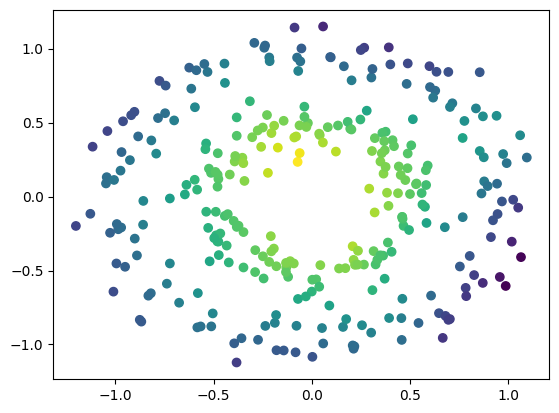

In [169]:
plt.scatter(X[:,0], X[:,1], c=y_pred.detach().numpy(), marker='o')
plt.show()

####  Multiclass Classification (Optional)


<img src = 'https://www.tomasbeuzen.com/deep-learning-with-pytorch/_images/nn-8.png' style='width:800px;height:400px'/>

In [269]:
class MultiClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

In [175]:
X, y = make_blobs(n_samples = 200, centers = 4, center_box=(-1.2, 1.2), cluster_std=[0.15, 0.15, 0.15, 0.15], random_state=12345)
X.shape, y.shape

((200, 2), (200,))

In [204]:
X_t = torch.tensor(X, dtype = torch.float32)
y_t = torch.tensor(y, dtype = torch.float32)
X_t.shape, y_t.shape

(torch.Size([200, 2]), torch.Size([200]))

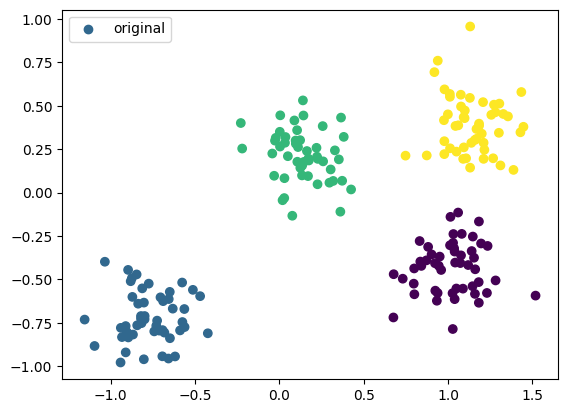

In [217]:
plt.scatter(X[:,0], X[:,1], label = "original", c = y)
plt.legend()
plt.show()

#### Data Loader

In [251]:
mc_datasets = TensorDataset(X_t, y_t)
mc_dataloader = DataLoader(mc_datasets, batch_size = BATCH_SIZE, shuffle = True)

#### Model

In [270]:
mc_model = MultiClassifier(input_size = 2, hidden_size = 5, output_size = 4)
mc_model

MultiClassifier(
  (main): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=4, bias=True)
  )
)

In [253]:
mc_model.state_dict()

OrderedDict([('main.0.weight',
              tensor([[-0.4686, -0.0287],
                      [-0.4227, -0.5463],
                      [-0.4269, -0.2942],
                      [-0.1528,  0.1183],
                      [-0.1753,  0.0965]])),
             ('main.0.bias',
              tensor([ 0.0418,  0.1753, -0.0265, -0.6269,  0.6730])),
             ('main.2.weight',
              tensor([[ 0.2533, -0.2065,  0.3690, -0.2932, -0.3579],
                      [-0.0668, -0.2160,  0.0864, -0.3541, -0.1094],
                      [ 0.2156,  0.2444, -0.0092,  0.2726,  0.2492],
                      [-0.3306, -0.0351, -0.3149, -0.3616, -0.3393]])),
             ('main.2.bias', tensor([-0.2058, -0.0268,  0.1926, -0.4347]))])

In [254]:
summary.summary(mc_model, (2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 5]              15
              ReLU-2                    [-1, 5]               0
            Linear-3                    [-1, 4]              24
           Softmax-4                    [-1, 4]               0
Total params: 39
Trainable params: 39
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


#### Loss Function

In [263]:
mc_criterion = nn.CrossEntropyLoss()#Softmax Included
mc_optimizer = optim.Adam(mc_model.parameters(), lr = 0.2)

#### Train Model

In [265]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [273]:
for epoch in range(10):
    losses = 0
    for X_batch, y_batch in mc_dataloader:
        X_batch = X_batch.to(device=device, dtype=torch.float) 
        y_batch = y_batch.to(device=device, dtype=torch.int64)    
        optimizer.zero_grad()       # Clear gradients w.r.t. parameters
        y_hat = mc_model(X_batch)          # Forward pass to get output
        #print(y_hat.shape, y_batch.shape)
        loss = mc_criterion(y_hat, y_batch)  # Calculate loss
        loss.backward()             # Getting gradients w.r.t. parameters
        optimizer.step()            # Update parameters
        losses += loss.item()       # Add loss for this batch to running total
    print(f"epoch: {epoch + 1}, loss: {losses / len(mc_dataloader):.4f}")


epoch: 1, loss: 1.4603
epoch: 2, loss: 1.4603
epoch: 3, loss: 1.4603
epoch: 4, loss: 1.4603
epoch: 5, loss: 1.4603
epoch: 6, loss: 1.4603
epoch: 7, loss: 1.4603
epoch: 8, loss: 1.4603
epoch: 9, loss: 1.4603
epoch: 10, loss: 1.4603


In [297]:
prediction = mc_model(torch.tensor([[-1, -1], [1,1]], dtype=torch.float32)).detach()
print(prediction)

tensor([[ 0.8129,  0.5907,  0.9607,  0.3566],
        [ 0.7799,  0.2939,  0.4142, -0.1651]])


In [298]:
probability = nn.Softmax(dim=1)(prediction)
print(probability)

tensor([[0.2783, 0.2228, 0.3226, 0.1763],
        [0.3707, 0.2280, 0.2572, 0.1441]])


In [299]:
probability.sum(dim=1)

tensor([1.0000, 1.0000])

In [300]:
classes = probability.argmax(dim=1)
print(classes)

tensor([2, 0])


In [316]:
y_pred = mc_model(torch.tensor(X_t, dtype=torch.float32)).detach().numpy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


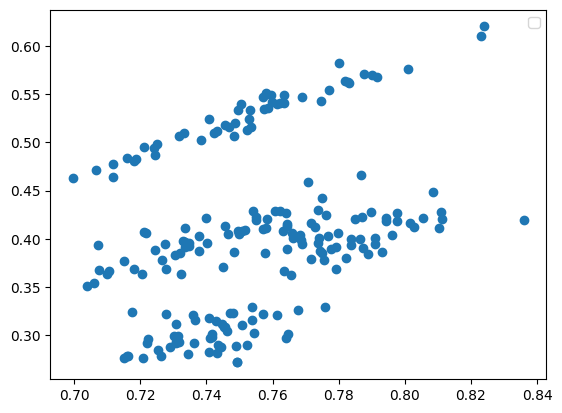

In [320]:
plt.scatter(y_pred[:,0], y_pred[:,1])
plt.legend()
plt.show()